# train.csv
- msno: user id
- song_id: song id
- source_system_tab: the name of the tab where the event was triggered. System tabs are used to - categorize KKBOX mobile apps functions. For example, tab my library contains functions to -manipulate the local storage, and tab search contains functions relating to search.
- source_screen_name: name of the layout a user sees.
- source_type: an entry point a user first plays music on mobile apps. An entry point could be album, online-playlist, song .. etc.
- target: this is the target variable. target=1 means there are recurring listening event(s) triggered within a month after the user’s very first observable listening event, target=0 otherwise .

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from datetime import datetime

In [11]:
#Load train document
train=pd.read_csv('data/train.csv', na_values='Unknown')
print(train.head())

                                           msno  \
0  FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=   
1  Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=   
2  Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=   
3  Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=   
4  FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=   

                                        song_id source_system_tab  \
0  BBzumQNXUHKdEBOB7mAJuzok+IJA1c2Ryg/yzTF6tik=           explore   
1  bhp/MpSNoqoxOIB+/l8WPqu6jldth4DIpCm3ayXnJqM=        my library   
2  JNWfrrC7zNN7BdMpsISKa4Mw+xVJYNnxXh3/Epw7QgY=        my library   
3  2A87tzfnJTSWqD7gIZHisolhe4DMdzkbd6LzO1KHjNs=        my library   
4  3qm6XTZ6MOCU11x8FIVbAGH5l5uMkT3/ZalWG1oo2Gc=           explore   

    source_screen_name      source_type  target  
0              Explore  online-playlist       1  
1  Local playlist more   local-playlist       1  
2  Local playlist more   local-playlist       1  
3  Local playlist more   local-playlist       1  
4              Explore  onli

In [3]:
#Transform source_screen_name values in lower letters
train['source_screen_name']=train['source_screen_name'].map(lambda x: x if type(x)!=str else x.lower())
print(train.head())

                                           msno  \
0  FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=   
1  Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=   
2  Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=   
3  Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=   
4  FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=   

                                        song_id source_system_tab  \
0  BBzumQNXUHKdEBOB7mAJuzok+IJA1c2Ryg/yzTF6tik=           explore   
1  bhp/MpSNoqoxOIB+/l8WPqu6jldth4DIpCm3ayXnJqM=        my library   
2  JNWfrrC7zNN7BdMpsISKa4Mw+xVJYNnxXh3/Epw7QgY=        my library   
3  2A87tzfnJTSWqD7gIZHisolhe4DMdzkbd6LzO1KHjNs=        my library   
4  3qm6XTZ6MOCU11x8FIVbAGH5l5uMkT3/ZalWG1oo2Gc=           explore   

    source_screen_name      source_type  target  
0              explore  online-playlist       1  
1  local playlist more   local-playlist       1  
2  local playlist more   local-playlist       1  
3  local playlist more   local-playlist       1  
4              explore  onli

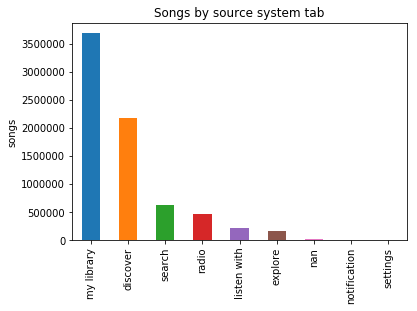

In [16]:
#Plot number of songs by language
(train.source_system_tab.value_counts(dropna=False)).plot(kind='bar')
plt.title('Songs by source system tab')
plt.ylabel('songs')
plt.show()

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7377418 entries, 0 to 7377417
Data columns (total 6 columns):
msno                  object
song_id               object
source_system_tab     object
source_screen_name    object
source_type           object
target                int64
dtypes: int64(1), object(5)
memory usage: 337.7+ MB


In [5]:
#Make source_system_tab, source_screen_name and source_type categorical variables
train['source_system_tab']=train['source_system_tab'].astype('category')
train['source_screen_name']=train['source_screen_name'].astype('category')
train['source_type']=train['source_type'].astype('category')
#Print train info to verify changes
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7377418 entries, 0 to 7377417
Data columns (total 6 columns):
msno                  object
song_id               object
source_system_tab     category
source_screen_name    category
source_type           category
target                int64
dtypes: category(3), int64(1), object(2)
memory usage: 190.0+ MB


In [6]:
#Make sure the target column is correct (only 0 or 1 values) and that the sample is well distributed
train.target.value_counts(dropna=False)

1    3714656
0    3662762
Name: target, dtype: int64

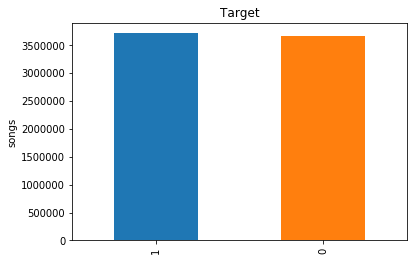

In [9]:
(train.target.value_counts(dropna=False)).plot(kind='bar')
plt.title('Target')
plt.ylabel('songs')
plt.show()

In [7]:
#Check amount of NaN in train.csv by column
train.isnull().sum()

msno                       0
song_id                    0
source_system_tab      24849
source_screen_name    468974
source_type            21539
target                     0
dtype: int64

In [8]:
#Explore data when source_system_tab is NaN
train[train.source_system_tab.isnull()]

,msno,song_id,source_system_tab,source_screen_name,source_type,target
86,rAI+tZ85/S4CEHBEhUkHDLO1afqVLArCu0nsBmORwfQ=,U03If8ekFQ69MIodnGZOgaFV9vbFpwDQZQYCf5To5fo=,NaN,NaN,NaN,0
88,rAI+tZ85/S4CEHBEhUkHDLO1afqVLArCu0nsBmORwfQ=,yv4Nasbw8r06KtMHzaEMF/SrpYPv+V73JrwFClUoRQ0=,NaN,NaN,NaN,0
89,rAI+tZ85/S4CEHBEhUkHDLO1afqVLArCu0nsBmORwfQ=,0cHV60MVnGOKMb/GRHWEExfpahkCwIZQ0wxdYBJfoqE=,NaN,NaN,NaN,0
653,1Gpomlljwhogv1K2O2qUdgZ5L43AyFswy9sau03mot8=,zx4aCmk+b/uPmvESsG8ekvi7qWmifSPNMXg1i8wyG8Q=,NaN,NaN,NaN,1
655,1Gpomlljwhogv1K2O2qUdgZ5L43AyFswy9sau03mot8=,reXuGcEWDDCnL0K3Th//3DFG4S1ACSpJMzA+CFipo1g=,NaN,NaN,NaN,1
656,1Gpomlljwhogv1K2O2qUdgZ5L43AyFswy9sau03mot8=,IIPVkO6EB8ymcuxkuxkum1N5gowLdTzy9sYF9luyhVk=,NaN,NaN,NaN,1
3745,1Gpomlljwhogv1K2O2qUdgZ5L43AyFswy9sau03mot8=,VodwEvJB2FUoIPAZhpqI+ml/3yzxl/fuw9xATZV1BIU=,NaN,NaN,NaN,1
3747,1Gpomlljwhogv1K2O2qUdgZ5L43AyFswy9sau03mot8=,JRa3KgSwWDyY17usXoi6jN8O6v6t6Tq4xcwjbUkbQFQ=,NaN,NaN,NaN,1
3748,1Gpomlljwhogv1K2O2qUdgZ5L43AyFswy9sau03mot8=,/GgZUQhPI/FEfpetN79CmK0gig4V2d0wiYQDGRbQ0Eg=,NaN,NaN,NaN,1
3749,1Gpomlljwhogv1K2O2qUdgZ5L43AyFswy9sau03mot8=,WsVr4mozaIQq9Tp8Ks0Iir3HIFTQQSpEDO1AmUIzdsc=,NaN,NaN,NaN,1


In [9]:
#Check how many NaN there are in other columns when source_system_tab is NaN
train[train.source_system_tab.isnull()].isnull().sum()

msno                      0
song_id                   0
source_system_tab     24849
source_screen_name    22327
source_type           18204
target                    0
dtype: int64

In [10]:
#Check how many NaN there are in other columns when source_type is NaN
train[train.source_type.isnull()].isnull().sum()

msno                      0
song_id                   0
source_system_tab     18204
source_screen_name    20744
source_type           21539
target                    0
dtype: int64

It looks like there around 18k rows that have missing values for source related information columns. Before exploring further the data, we will drop all rows where all these three columns have missing values. 
This does not represent a big amount of the data, so it is fine to delete these rows.

In [11]:
train_clean=train.dropna(subset=['source_system_tab','source_screen_name','source_type'], how='all')
train_clean.isnull().sum()

msno                       0
song_id                    0
source_system_tab       6645
source_screen_name    450770
source_type             3335
target                     0
dtype: int64

After dropping rows with all source related information columns missing, let's to check if we can remove the rest of the rows with missing values in source_system_tab. 
For that purpose, we will try to answer the following questions:
- Are rows with source_system_tab NaN values concentrated in one/few types of source_type? Do they represent more than 5% of the data?
- Are rows with source_system_tab NaN values concentrated in one/few types of source_screen_name? Do they represent more than 5% of the data?

In [12]:
#Are rows with source_system_tab NaN values concentrated in one type of source_type?
#Count missing source_system_tab values depending on the source_type: df11
df11=train_clean[train_clean.source_system_tab.isnull()].groupby(['source_type']).msno.count()
#Count entries by source type: df12
df12=train_clean.groupby(['source_type']).msno.count()
#Concatenate df11 and df12 to perform calculations: df13
df13=pd.concat([df11,df12],axis=1,sort=True)
#Rename columns in df13
df13.columns=['count missing','count total']
#Compute % missing values with respect to total number of entries per source_type
df13['%missing']=df13['count missing']/df13['count total']*100
print(df13)

                        count missing  count total  %missing
source_type                                                 
album                             140       477344  0.029329
artist                              0         3038  0.000000
listen-with                        35       192842  0.018150
local-library                    1769      2261399  0.078226
local-playlist                    617      1079503  0.057156
my-daily-playlist                   0          663  0.000000
online-playlist                  3349      1967924  0.170179
radio                             428       483109  0.088593
song                               29       244722  0.011850
song-based-playlist                93       210527  0.044175
top-hits-for-artist               185       423614  0.043672
topic-article-playlist              0        11194  0.000000


Text(0.5,1,'% source_system_tab NaN depending on the source_type')

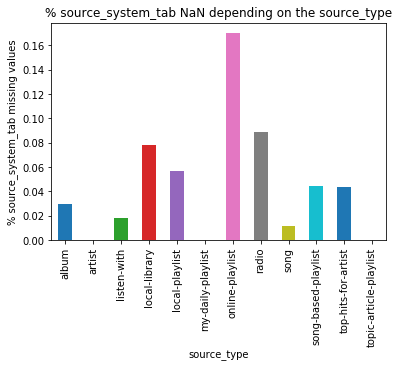

In [13]:
#Plot % of missing source_system_tab values depending on the source_type
df13['%missing'].plot(kind='bar')
plt.ylabel('% source_system_tab missing values')
plt.xlabel('source_type')
plt.title('% source_system_tab NaN depending on the source_type')

In [14]:
#Are rows with source_system_tab NaN values concentrated in one type of source_screen_name?
#Count missing source_system_tab values depending on the source_screen_name: df21
df21=train_clean[train_clean.source_system_tab.isnull()].groupby(['source_screen_name']).msno.count()
#Count entries by source_screen_name: df22
df22=train_clean.groupby(['source_screen_name']).msno.count()
#Concatenate df21 and df22 to perform calculations: df23
df23=pd.concat([df21,df22],axis=1,sort=True)
#Rename columns in df23
df23.columns=['count missing','count total']
#Compute % missing values with respect to total number of entries per source_type
df23['%missing']=df23['count missing']/df23['count total']*100
print(df23)

                      count missing  count total  %missing
source_screen_name                                        
album more                      113       420156  0.026895
artist more                       2       252429  0.000792
concert                           0           47  0.000000
discover chart                   88       213658  0.041187
discover feature                267       244246  0.109316
discover genre                    1        82202  0.001217
discover new                      0        15955  0.000000
explore                          65        72342  0.089851
local playlist more             501      3228202  0.015519
my library                     1151        75980  1.514872
my library_search                 0         6451  0.000000
online playlist more            276      1294689  0.021318
others profile more               0       201795  0.000000
payment                           0           12  0.000000
radio                            15       474467  0.0031

Text(0.5,1,'% source_system_tab NaN depending on the source_screen_name')

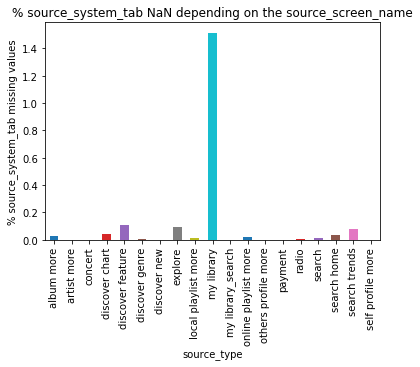

In [15]:
#Plot % of missing source_system_tab values depending on the source_screen_name
df23['%missing'].plot(kind='bar')
plt.ylabel('% source_system_tab missing values')
plt.xlabel('source_type')
plt.title('% source_system_tab NaN depending on the source_screen_name')

Missing values in source_system_tab will be dropped since in none of the source_screen_name or source_type categories represent more than 5% of the data.

Let's check if we can remove the rest of the rows with missing values in source_type. For that purpose, we will try to answer the following questions:
- Are rows with source_type NaN values concentrated in one/few types of source_system_tab? Do they represent more than 5% of the data?
- Are rows with source_type NaN values concentrated in one/few types of source_screen_name? Do they represent more than 5% of the data?


In [16]:
#Are rows with source_type NaN values concentrated in one type of source_system_tab?
#Count missing source_type values depending on the source_system_tab: df31
df31=train_clean[train_clean.source_type.isnull()].groupby(['source_system_tab']).msno.count()
#Count entries by source type: df32
df32=train_clean.groupby(['source_system_tab']).msno.count()
#Concatenate df31 and df32 to perform calculations: df33
df33=pd.concat([df31,df32],axis=1,sort=True)
#Rename columns in df33
df33.columns=['count missing','count total']
#Compute % missing values with respect to total number of entries per source_type
df33['%missing']=df33['count missing']/df33['count total']*100
print(df33)

                   count missing  count total  %missing
source_system_tab                                      
discover                     913      2179252  0.041895
explore                      613       167949  0.364992
listen with                    4       212266  0.001884
my library                  1723      3684730  0.046761
notification                  11         6185  0.177850
radio                          2       476701  0.000420
search                        69       623286  0.011070
settings                       0         2200  0.000000


Text(0.5,1,'% source_type NaN depending on the source_system_tab')

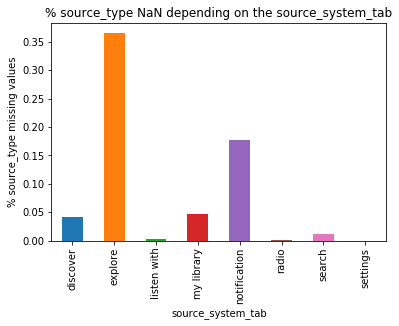

In [17]:
#Plot % of missing source_type values depending on the source_system_tab
df33['%missing'].plot(kind='bar')
plt.ylabel('% source_type missing values')
plt.xlabel('source_system_tab')
plt.title('% source_type NaN depending on the source_system_tab')

In [18]:
#Are rows with source_type NaN values concentrated in one type of source_screen_name?
#Count missing source_type values depending on the source_screen_name: df41
df41=train_clean[train_clean.source_type.isnull()].groupby(['source_screen_name']).msno.count()
#Count entries by source type: df42
df42=train_clean.groupby(['source_screen_name']).msno.count()
#Concatenate df41 and df42 to perform calculations: df43
df43=pd.concat([df41,df42],axis=1,sort=True)
#Rename columns in df43
df43.columns=['count missing','count total']
#Compute % missing values with respect to total number of entries per source_type
df43['%missing']=df43['count missing']/df43['count total']*100
print(df43)

                      count missing  count total  %missing
source_screen_name                                        
album more                      774       420156  0.184217
artist more                       0       252429  0.000000
concert                           0           47  0.000000
discover chart                    0       213658  0.000000
discover feature                  0       244246  0.000000
discover genre                    0        82202  0.000000
discover new                      0        15955  0.000000
explore                          18        72342  0.024882
local playlist more               3      3228202  0.000093
my library                        0        75980  0.000000
my library_search                 0         6451  0.000000
online playlist more              0      1294689  0.000000
others profile more               0       201795  0.000000
payment                           0           12  0.000000
radio                             0       474467  0.0000

Text(0.5,1,'% source_type NaN depending on the source_screen_name')

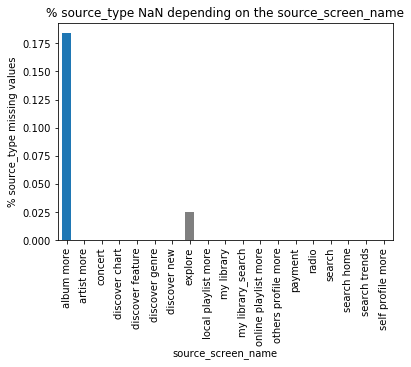

In [19]:
#Plot % of missing source_type values depending on the source_screen_name
df43['%missing'].plot(kind='bar')
plt.ylabel('% source_type missing values')
plt.xlabel('source_screen_name')
plt.title('% source_type NaN depending on the source_screen_name')

Missing values in source_type will be dropped since in none of the source_screen_name or source_system_tab categories represent more than 5% of the data.

In [20]:
#Drop raws missing values in source_system_tab and source_type columns
train_clean_2=train.dropna(subset=['source_system_tab','source_type'], how='any')
train_clean_2.isnull().sum()

msno                       0
song_id                    0
source_system_tab          0
source_screen_name    444107
source_type                0
target                     0
dtype: int64

In [21]:
train_clean_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7349234 entries, 0 to 7377417
Data columns (total 6 columns):
msno                  object
song_id               object
source_system_tab     category
source_screen_name    category
source_type           category
target                int64
dtypes: category(3), int64(1), object(2)
memory usage: 245.3+ MB


Let's check how the source_screen_name NaN values are distributed.

In [22]:
#Are rows with source_screen_name NaN values concentrated in one type of source_system_tab?
#Count missing source_screen_name values depending on the source_system_tab: df51
df51=train_clean_2[train_clean_2.source_screen_name.isnull()].groupby(['source_system_tab']).msno.count()
#Count entries by source type: df52
df52=train_clean_2.groupby(['source_system_tab']).msno.count()
#Concatenate df51 and df52 to perform calculations: df53
df53=pd.concat([df51,df52],axis=1,sort=True)
#Rename columns in df53
df53.columns=['count missing','count total']
#Compute % missing values with respect to total number of entries per source_type
df53['%missing']=df53['count missing']/df53['count total']*100
print(df53)

                   count missing  count total   %missing
source_system_tab                                       
discover                  266050      2178339  12.213434
explore                    21702       167336  12.969116
listen with                 7396       212262   3.484373
my library                141080      3683007   3.830566
notification                 355         6174   5.749919
radio                       6047       476699   1.268515
search                       127       623217   0.020378
settings                    1350         2200  61.363636


Text(0.5,1,'% source_screen_name NaN depending on the source_system_tab')

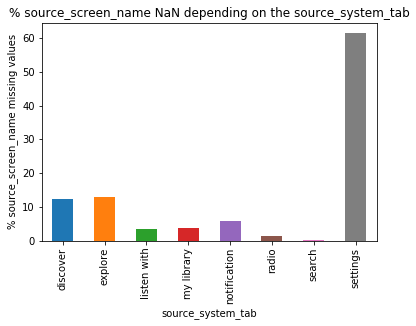

In [23]:
#Plot % of missing source_screen_name values depending on the source_system_tab in train_clean_2
df53['%missing'].plot(kind='bar')
plt.ylabel('% source_screen_name missing values')
plt.xlabel('source_system_tab')
plt.title('% source_screen_name NaN depending on the source_system_tab')

Missing values in source_screen_name can't be dropped. In the case of source_system_tab=settings missing values represent more than 50% of rows. 

In [24]:
#Are rows with source_screen_name NaN values concentrated in one type of source_type?
#Count missing source_screen_name values depending on the source_type: df61
df61=train_clean_2[train_clean_2.source_screen_name.isnull()].groupby(['source_type']).msno.count()
#Count entries by source type: df62
df62=train_clean_2.groupby(['source_type']).msno.count()
#Concatenate df61 and df62 to perform calculations: df53
df63=pd.concat([df61,df62],axis=1,sort=True)
#Rename columns in df63
df63.columns=['count missing','count total']
#Compute % missing values with respect to total number of entries per source_type
df63['%missing']=df63['count missing']/df63['count total']*100
print(df63)

                        count missing  count total   %missing
source_type                                                  
album                            5269       477204   1.104140
artist                             86         3038   2.830810
listen-with                      5758       192807   2.986406
local-library                   44393      2259630   1.964614
local-playlist                  20200      1078886   1.872302
my-daily-playlist                 285          663  42.986425
online-playlist                119807      1964575   6.098367
radio                            5123       482681   1.061364
song                            28528       244693  11.658691
song-based-playlist             48543       210434  23.068040
top-hits-for-artist            164306       423429  38.803672
topic-article-playlist           1809        11194  16.160443


Text(0.5,1,'% source_screen_name NaN depending on the source_type')

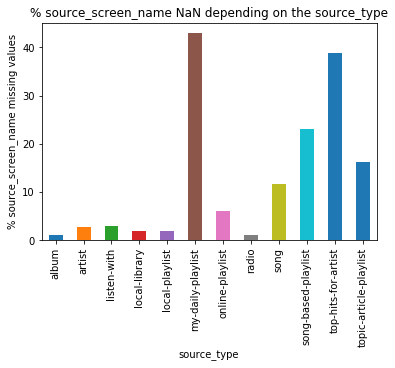

In [25]:
#Plot % of missing source_screen_name values depending on the source_type in train_clean_2
df63['%missing'].plot(kind='bar')
plt.ylabel('% source_screen_name missing values')
plt.xlabel('source_type')
plt.title('% source_screen_name NaN depending on the source_type')

As stated before, percentages of missing source_screen_name values are very high for some source_type categories. This missing values need to be kept to avoid introducing bias. 
Most likely column source_screen_name won't be use later on to drive conclusions.

In [26]:
#Check if the relationship users-song_id is 1 to 1 as stated in the documentation
train.groupby(['msno','song_id'])['target'].count().sort_values(ascending=False).head()

msno                                          song_id                                     
zzzRi5ek1YCKTGns8C77xwAutE05PAPmz8T/pIIQhzE=  wBTWuHbjdjxnG1lQcbqnK4FddV24rUhuyrYLd9c/hmk=    1
JlclbZ87Se0GRiCBvoyWzAhSKdj/TPee2qC2KnJBcyQ=  rG9ZNLzZjEAI06bHg5jNbG7KptynQvEVQiHo+YLdT8k=    1
                                              wBTWuHbjdjxnG1lQcbqnK4FddV24rUhuyrYLd9c/hmk=    1
                                              wJdog4OHtULqly94aQ/X2uud6ya+juDh25ay4sqoxuI=    1
                                              wSzDoYx37ySD3tRiQrOs17vjwi1KQj3TLtb3p6VY+2A=    1
Name: target, dtype: int64

In [28]:
#Export clean file as train_clean.csv
train_clean_2.to_csv('data/train_clean.csv', index=False)